In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from data_cleaner import cleaner

In [ ]:
data = pd.read_csv("./data/alcohol-consumption.csv")
data = cleaner(data)
data.head(44)

In [ ]:
sorted_by_alcohol_high = data.sort_values(by='total_consumption', ascending=False)
x = sorted_by_alcohol_high['country'].head(10)
y = sorted_by_alcohol_high['total_consumption'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.summer  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 20))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 1, f"{liters:.1f}", ha="center")

ax.set_title("Countries with the highest pure alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Pure alcohol in liters", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

In [ ]:
sorted_by_alcohol_low = data.sort_values(by='total_consumption')
x = sorted_by_alcohol_low['country'].head(10)
y = sorted_by_alcohol_low['total_consumption'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.summer_r  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 10))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 0.5, f"{liters:.1f}", ha="center")

ax.set_title("Countries with the lowest pure alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Pure alcohol in liters", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

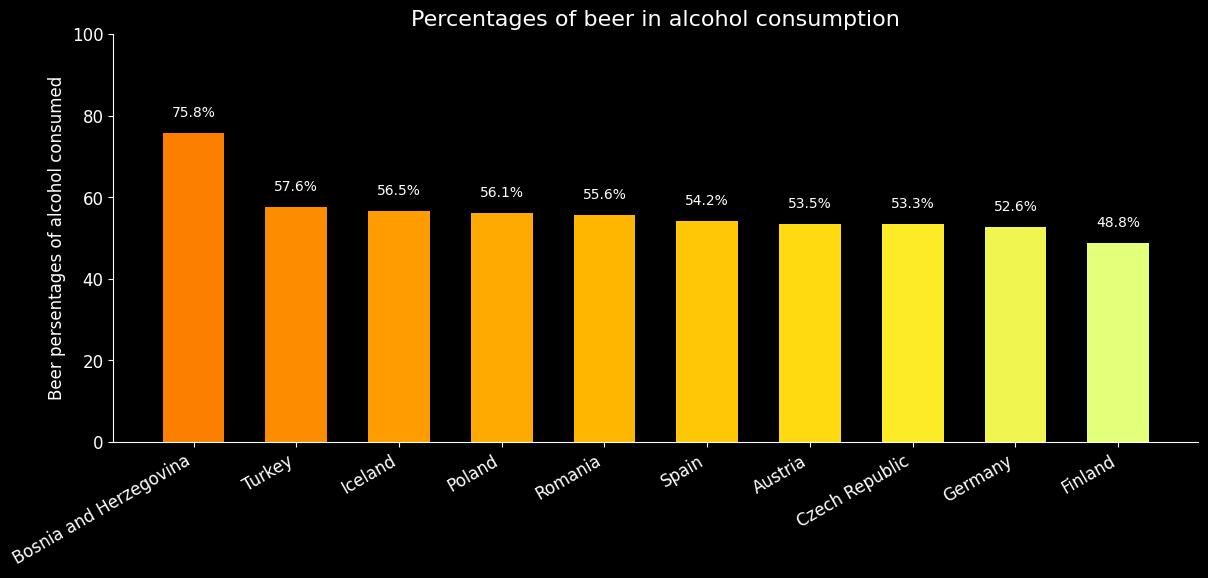

In [5]:
sorted_by_beer = data.sort_values(by='beer_percentage', ascending=False)
x = sorted_by_beer['country'].head(10)
y = sorted_by_beer['beer_percentage'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.Wistia_r  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 100))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 5, f"{liters}%", ha="center", va="center")

ax.set_title("Percentages of beer in alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Beer persentages of alcohol consumed", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()

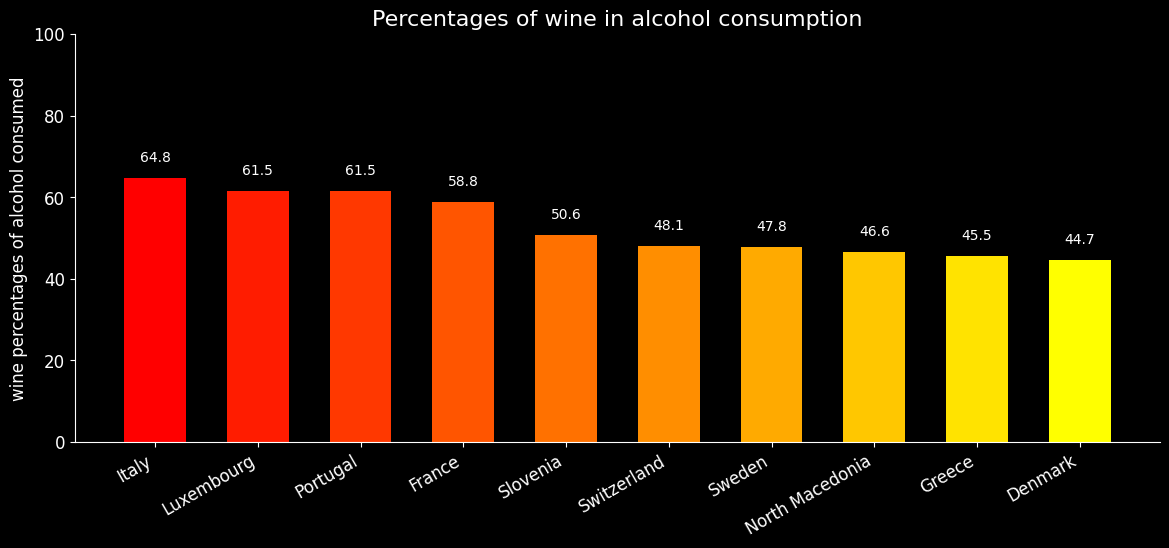

In [8]:
sorted_by_wine = data.sort_values(by='wine_percentage', ascending=False)
x = sorted_by_wine['country'].head(10)
y = sorted_by_wine['wine_percentage'].head(10)

# Tworzenie mapy kolorów
cmap = plt.cm.autumn  # Wybór mapy kolorów
colors = cmap(np.linspace(0, 1, len(y)))  # Generowanie kolorów dla każdego słupka

plt.style.use('dark_background')
fig, ax = plt.subplots(figsize=(14, 6))
plt.ylim((0, 100))

ax.bar(x, y, width=0.6, color=colors)

for i, liters in enumerate(y):
    ax.text(i, liters + 5, f"{liters}", ha="center", va="center")

ax.set_title("Percentages of wine in alcohol consumption", fontsize=16)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("wine percentages of alcohol consumed", fontsize=12)
ax.tick_params(labelsize=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)

fig.autofmt_xdate()